# Children Sexual Abuse Awareness

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload 
import warnings
import os
import csv
import sys
import re

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

sb.set_style('darkgrid')
sb.set()

plt.style.use('seaborn')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:\Open Classroom\Datasets\Child Sexual Abuse Awareness Prediction\CSA-Data.csv")
df.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [5]:
df.shape

(3002, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002 entries, 0 to 3001
Data columns (total 9 columns):
"Children are safe among family members such as grandparents, uncles, aunts, cousins"                     3002 non-null object
"Children are mainly abused by strangers in our society"                                                  3002 non-null object
Male children dont need sexual abuse prevention knowledge                                                 3002 non-null object
"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"    3002 non-null object
Do you know what child grooming is?                                                                       3002 non-null object
Do you know what signs to look for to identify if your child has been abused?                             3002 non-null object
Do you think children need post abuse counseling for recovering?                                          3002 non-null object
Do yo

In [9]:
df.columns

Index(['"Children are safe among family members such as grandparents, uncles, aunts, cousins"',
       '"Children are mainly abused by strangers in our society"',
       'Male children dont need sexual abuse prevention knowledge',
       '"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"',
       'Do you know what child grooming is?',
       'Do you know what signs to look for to identify if your child has been abused?',
       'Do you think children need post abuse counseling for recovering?',
       'Do you think you should take legal action against the abuser of your child?',
       'Knowledge Level'],
      dtype='object')

In [10]:
df.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [11]:
df['Knowledge Level'].value_counts()

Beginner        1711
Intermediate    1291
Name: Knowledge Level, dtype: int64

Text(0.5, 1.0, 'Children Saftey among Family Members')

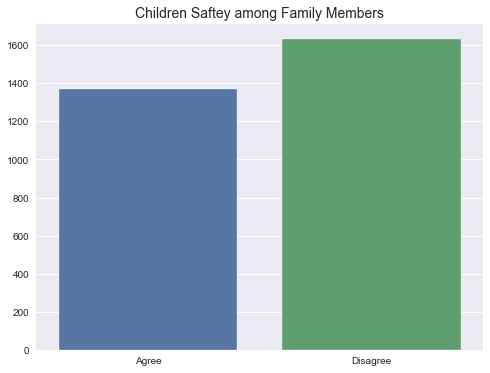

In [24]:
plt.figure(figsize = (8,6))
sb.countplot(df['"Children are safe among family members such as grandparents, uncles, aunts, cousins"'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Children Saftey among Family Members', fontdict = {'size': 14})

Text(0.5, 1.0, 'Children are mainly abused by strangers in our society')

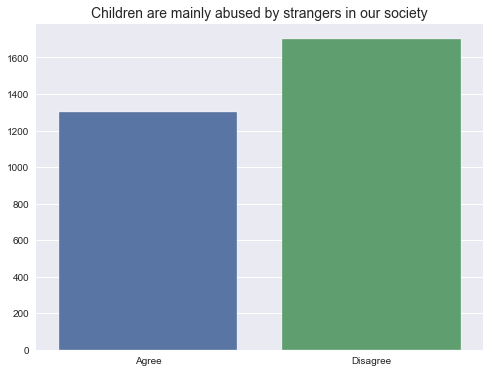

In [26]:
plt.figure(figsize = (8,6))
sb.countplot(df['"Children are mainly abused by strangers in our society"'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Children are mainly abused by strangers in our society', fontdict = {'size': 14})

Text(0.5, 1.0, 'Male children dont need sexual abuse \nprevention knowledge')

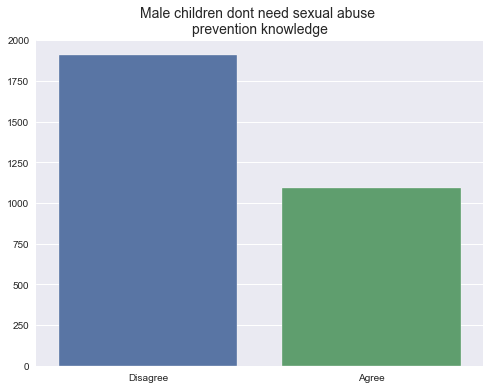

In [28]:
plt.figure(figsize = (8,6))
sb.countplot(df['Male children dont need sexual abuse prevention knowledge'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Male children dont need sexual abuse \nprevention knowledge', fontdict = {'size': 14})

Text(0.5, 1.0, 'Necessity of teaching Sexual abuse in schools')

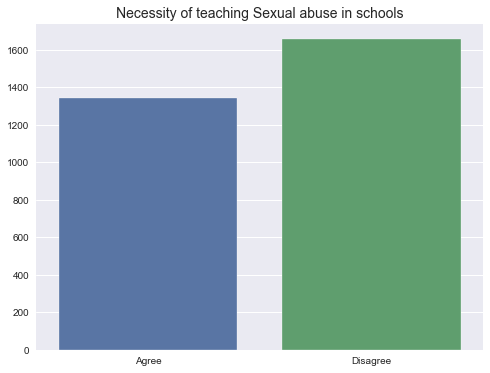

In [30]:
plt.figure(figsize = (8,6))
sb.countplot(df['"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Necessity of teaching Sexual abuse in schools', fontdict = {'size': 14})

Text(0.5, 1.0, 'Do you know what child grooming is?')

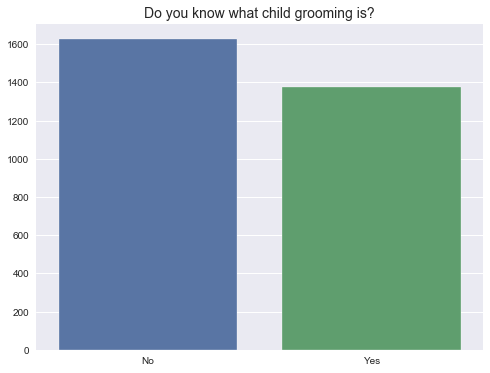

In [31]:
plt.figure(figsize = (8,6))
sb.countplot(df['Do you know what child grooming is?'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Do you know what child grooming is?', fontdict = {'size': 14})

Text(0.5, 1.0, 'Do you know to identify an Abused Child')

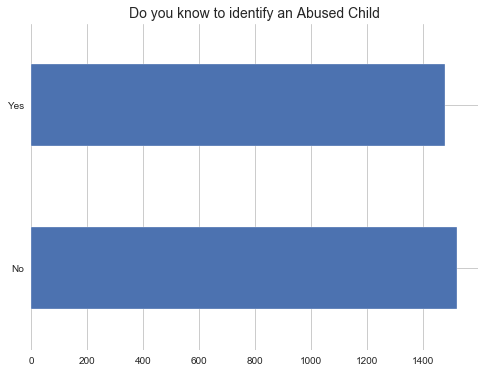

In [66]:
plt.figure(figsize = (8,6))
df['Do you know what signs to look for to identify if your child has been abused?'].value_counts().plot(kind='barh')
plt.ylabel(None)
plt.xlabel(None)
plt.title('Do you know to identify an Abused Child', fontdict = {'size': 14})

Text(0.5, 1.0, 'Do you think children need post abuse \ncounseling for recovering?')

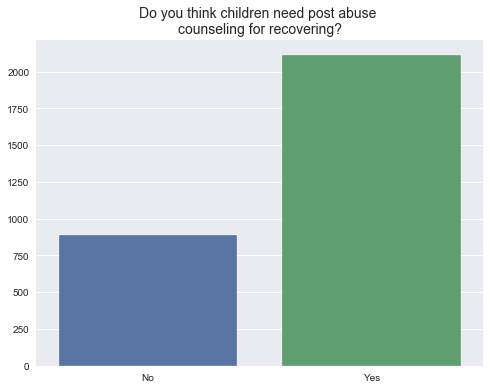

In [34]:
plt.figure(figsize = (8,6))
sb.countplot(df['Do you think children need post abuse counseling for recovering?'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Do you think children need post abuse \ncounseling for recovering?', fontdict = {'size': 14})

Text(0.5, 1.0, 'Legal action against abusers')

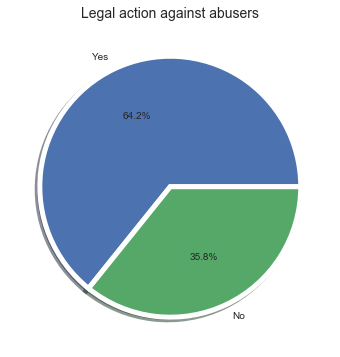

In [58]:
plt.figure(figsize = (8,6))
sb.set_style('whitegrid')
plt.pie(df['Do you think you should take legal action against the abuser of your child?'].value_counts(), 
        labels=df['Do you think you should take legal action against the abuser of your child?'].unique(), autopct='%1.1f%%', frame=False, wedgeprops={'linewidth':5}, 
       shadow = True)
plt.ylabel(None)
plt.xlabel(None)
plt.title('Legal action against abusers', fontdict = {'size': 14})

Text(0.5, 1.0, 'Knowledge Level')

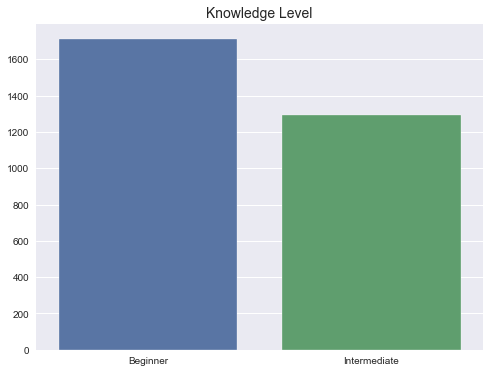

In [36]:
plt.figure(figsize = (8,6))
sb.countplot(df['Knowledge Level'])
plt.ylabel(None)
plt.xlabel(None)
plt.title('Knowledge Level', fontdict = {'size': 14})

In [37]:
df.head()

,"""Children are safe among family members such as grandparents, uncles, aunts, cousins""","""Children are mainly abused by strangers in our society""",Male children dont need sexual abuse prevention knowledge,"""Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex""",Do you know what child grooming is?,Do you know what signs to look for to identify if your child has been abused?,Do you think children need post abuse counseling for recovering?,Do you think you should take legal action against the abuser of your child?,Knowledge Level
0,Agree,Agree,Disagree,Agree,No,No,No,Yes,Beginner
1,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
2,Disagree,Disagree,Disagree,Disagree,No,No,Yes,Yes,Beginner
3,Agree,Agree,Disagree,Disagree,No,No,Yes,Yes,Beginner
4,Agree,Disagree,Disagree,Disagree,Yes,Yes,Yes,Yes,Intermediate


In [38]:
df.columns

Index(['"Children are safe among family members such as grandparents, uncles, aunts, cousins"',
       '"Children are mainly abused by strangers in our society"',
       'Male children dont need sexual abuse prevention knowledge',
       '"Teaching sexual abuse prevention in school is not necessary. It will make children curious about sex"',
       'Do you know what child grooming is?',
       'Do you know what signs to look for to identify if your child has been abused?',
       'Do you think children need post abuse counseling for recovering?',
       'Do you think you should take legal action against the abuser of your child?',
       'Knowledge Level'],
      dtype='object')

In [45]:
df['Do you think you should take legal action against the abuser of your child?'].value_counts()

Yes    1928
No     1074
Name: Do you think you should take legal action against the abuser of your child?, dtype: int64